In [51]:
# 📦 Importy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cmdstanpy
from cmdstanpy import CmdStanModel
import arviz as az
import scipy.stats as stats
# warnings.filterwarnings('ignore')

# 🧾 Wczytanie danych
df = pd.read_csv("Energy_consumption.csv")
df.head()


,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


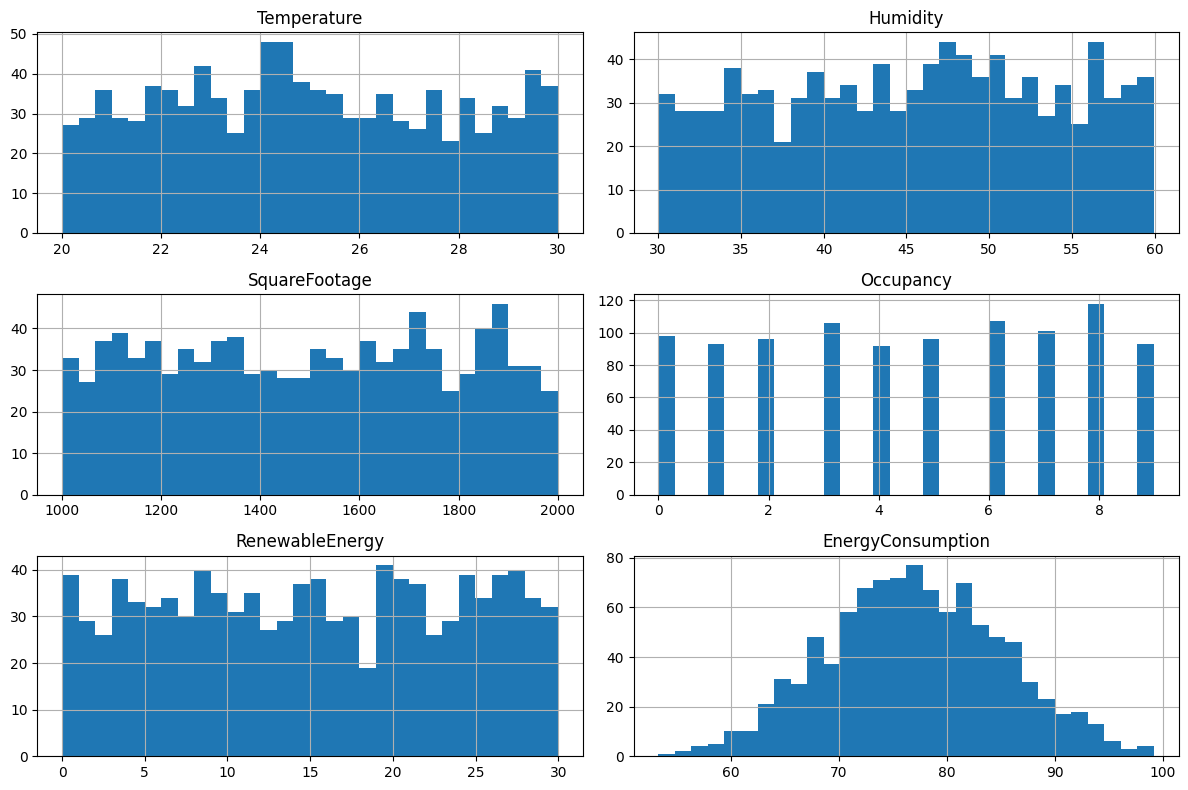

In [52]:
# Krótka analiza
df.describe()
df.info()

# Wizualizacja rozkładu danych
df.hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()


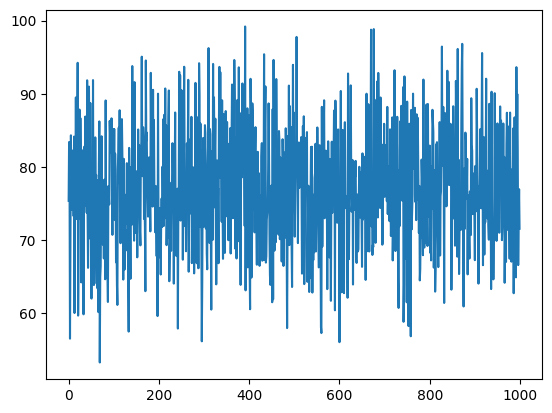

In [53]:
plt.plot(df['EnergyConsumption'])
plt.show()

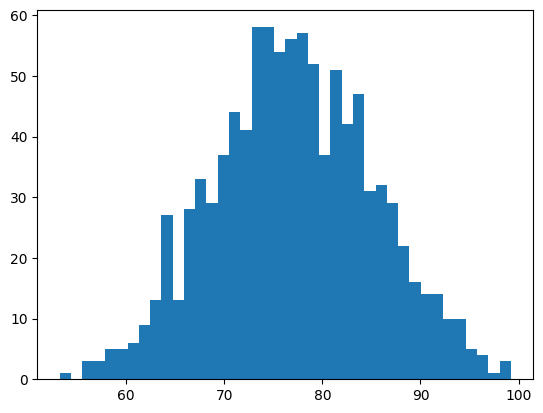

In [54]:
plt.hist(df['EnergyConsumption'], bins=40)
plt.show()

In [55]:
# Zakładamy, że mamy kolumnę np. "energy"
energy_data = df["EnergyConsumption"]


# Creating models
N = 25
R = 100

model_prior = CmdStanModel(stan_file='prior.stan')
model_posterior = CmdStanModel(stan_file='posterior.stan')

df_subset = df.iloc[:N]
# Setting data
data = {'N': N, 'temperature': df_subset['Temperature']}

# Sampling z priora
prior_1 = model_prior.sample(
    data=data,
    iter_sampling=1000,
    iter_warmup=1,
    chains=1,
    fixed_param=True,
    seed=29042020,
    refresh=100
)

# Odczyt wyników
prior_df = prior_1.draws_pd()
prior_df.head()


19:54:42 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


19:54:42 - cmdstanpy - INFO - CmdStan done processing.


,chain__,iter__,draw__,lp__,accept_stat__,alpha,beta,sigma,y_sim[1],y_sim[2],...,y_sim[16],y_sim[17],y_sim[18],y_sim[19],y_sim[20],y_sim[21],y_sim[22],y_sim[23],y_sim[24],y_sim[25]
0,1.0,1.0,1.0,0.0,0.0,1.23549,94525.3,909.585,93735.3,93537.9,...,95622.4,92539.6,94399.5,95021.8,94030.1,94184.3,95687.8,93938.5,94058.6,93746.2
1,1.0,2.0,2.0,0.0,0.0,1.32433,94858.2,1327.230,92969.3,93867.3,...,96792.0,92833.8,96767.2,94299.9,94745.7,94371.1,93194.5,96521.5,96044.1,94404.4
2,1.0,3.0,3.0,0.0,0.0,1.20713,97428.9,1164.670,96696.9,100099.0,...,99283.6,96579.7,95081.5,97590.8,96724.3,98007.0,97761.0,96872.1,96658.7,98280.0
3,1.0,4.0,4.0,0.0,0.0,1.19308,95433.5,1445.200,95481.9,95434.3,...,94360.6,92474.8,96452.7,96914.3,93754.5,95823.9,95628.0,92520.1,93820.3,99137.7
4,1.0,5.0,5.0,0.0,0.0,1.32782,94978.1,1783.150,97491.4,95291.8,...,95552.1,96573.0,95285.3,95501.6,96795.6,95003.5,91131.4,92689.9,95460.7,95328.3


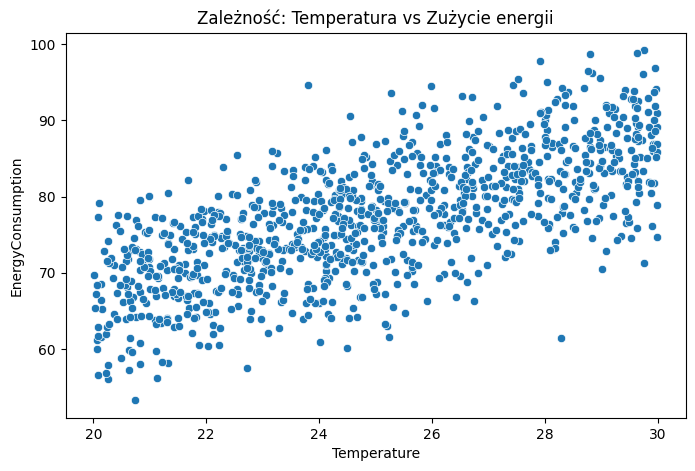

In [56]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Temperature', y='EnergyConsumption')
plt.title("Zależność: Temperatura vs Zużycie energii")
plt.show()

In [57]:
az.summary(prior_1)

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.261,0.050,1.157,1.346,0.002,0.001,963.0,922.0,NaN
beta,94801.938,1480.185,92065.400,97604.000,48.222,34.032,944.0,1063.0,NaN
sigma,1300.109,206.896,896.750,1675.500,6.775,4.849,930.0,971.0,NaN
y_sim[0],94816.178,2035.276,90857.700,98454.600,66.600,47.929,931.0,841.0,NaN
y_sim[1],94813.308,1957.311,91340.200,98609.200,65.372,43.534,895.0,980.0,NaN
y_sim[2],94899.152,2006.869,91391.000,99006.400,64.419,44.399,969.0,983.0,NaN
y_sim[3],94826.402,2027.614,91206.800,98831.100,63.059,46.667,1030.0,901.0,NaN
y_sim[4],94859.556,1991.376,91317.800,98556.900,62.361,47.077,1021.0,921.0,NaN
y_sim[5],94883.348,1982.043,90834.200,98342.900,64.639,46.960,941.0,946.0,NaN
y_sim[6],94879.243,2009.597,90503.400,98236.100,63.417,48.295,1003.0,908.0,NaN


In [66]:
data = {'N': N, 'temperature': df_subset['Temperature'], 'y': df_subset['EnergyConsumption']}
post_1 = model_posterior.sample(data=data, chains=1, iter_sampling=100)

19:56:37 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


19:56:38 - cmdstanpy - INFO - CmdStan done processing.


In [72]:
post_1.y_sim.mean(0)

array([75.988239, 80.541858, 81.730375, 70.767904, 74.599933, 82.21682 ,
       75.618763, 74.813878, 78.698632, 72.996892, 81.012368, 76.036975,
       77.287965, 70.174082, 78.706728, 73.758312, 83.122187, 76.131685,
       80.543692, 78.860122, 81.131127, 72.489792, 73.310062, 76.803848,
       78.610797])

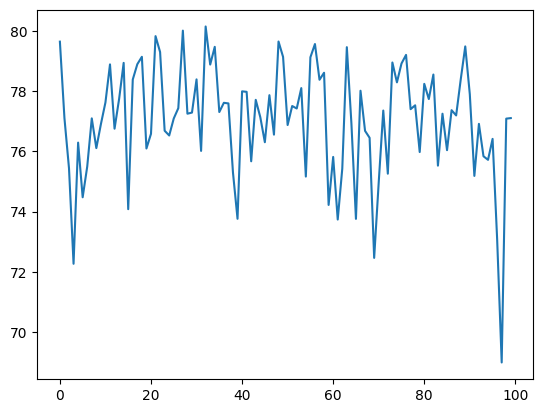

In [76]:
plt.plot(post_1.y_sim.mean(1))

In [67]:
az.summary(post_1)

arviz - WARNING - Shape validation failed: input_shape: (1, 100), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.284,0.044,1.202,1.355,0.005,0.003,70.0,78.0,NaN
beta,44.965,1.573,42.702,47.730,0.210,0.101,57.0,77.0,NaN
sigma,6.568,0.913,5.056,8.490,0.118,0.082,59.0,78.0,NaN
y_sim[0],75.988,6.820,63.774,90.205,0.627,0.564,133.0,77.0,NaN
y_sim[1],80.542,6.496,68.191,92.278,0.775,0.466,77.0,57.0,NaN
y_sim[2],81.730,6.741,70.261,93.554,0.583,0.421,140.0,78.0,NaN
y_sim[3],70.768,6.750,59.700,82.934,0.725,0.516,89.0,78.0,NaN
y_sim[4],74.600,6.679,62.536,85.185,0.780,0.682,76.0,93.0,NaN
y_sim[5],82.217,7.176,71.069,98.945,0.739,0.498,96.0,78.0,NaN
y_sim[6],75.619,6.655,66.196,89.073,0.651,0.532,100.0,108.0,NaN
